# Project Name: Customer Churn Prediction-Telecom

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# Data Mining & Exploration


In [4]:
# Loading the CSV with pandas
data = pd.read_csv('Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data compises of Services — which services the customer subscribed to (internet, phone, cable, etc.), Monthly bill total, Tenure — How long they had been a customer, Basic demographic info — whether they were elderly, had dependents, etc.

In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.¶Also, converting Total Charges to a numerical data type.

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above output, it can be seen that, there are 11 missing values for Total Charges. Replacing 11 rows from the data set. Also predictor variable here is Churn. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

In [10]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [11]:
df_dummies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

Correlations between customer data features and customer churn. 

Examining the correlation between churn and each customer feature to decide which features of the data to include in the predictive churn model.

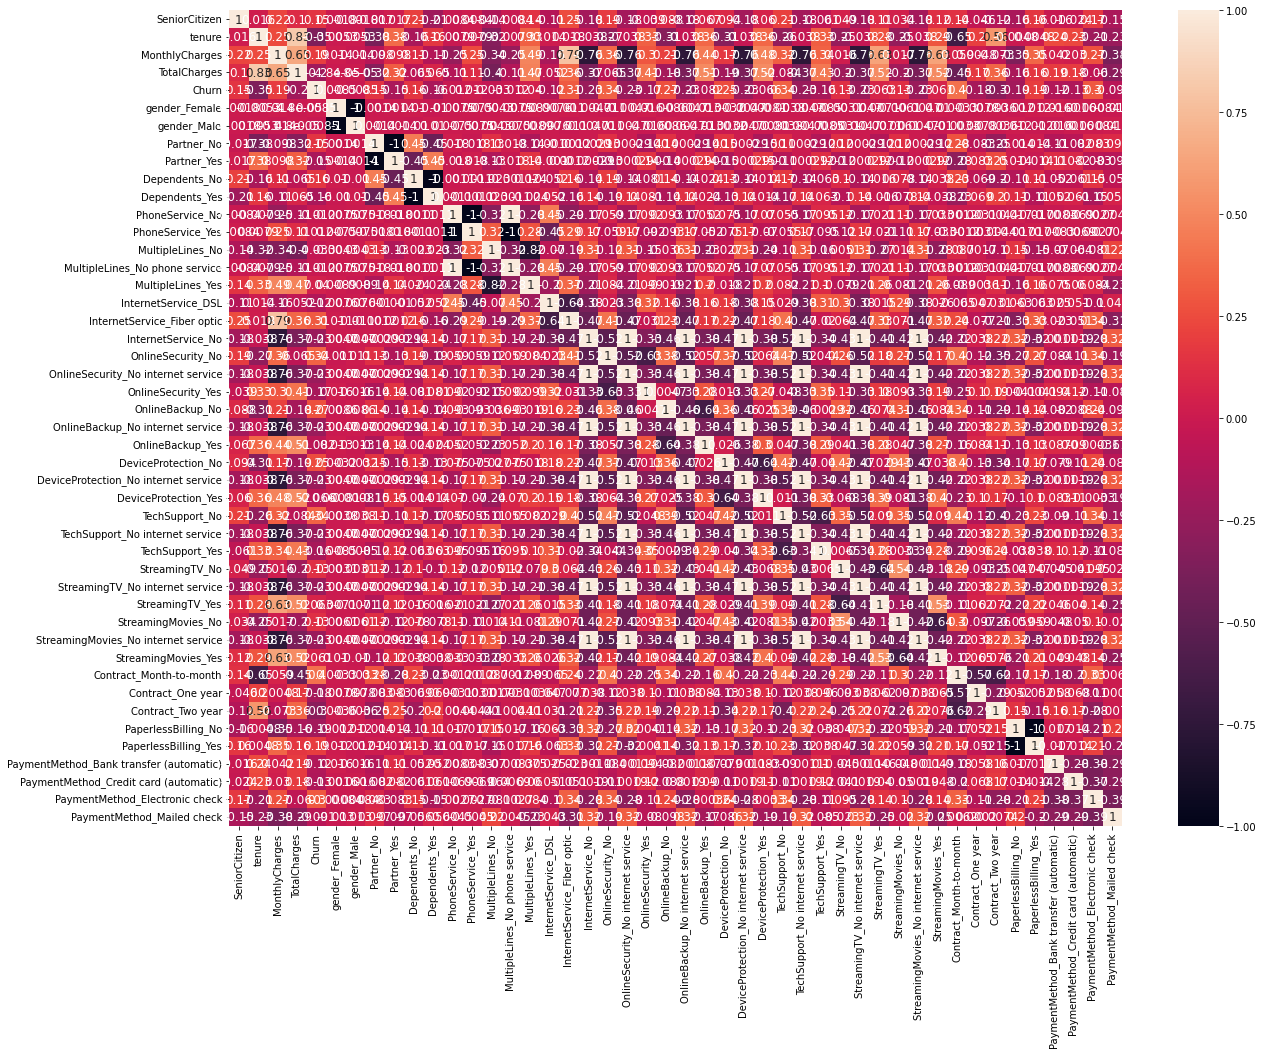

In [12]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.


<AxesSubplot:>

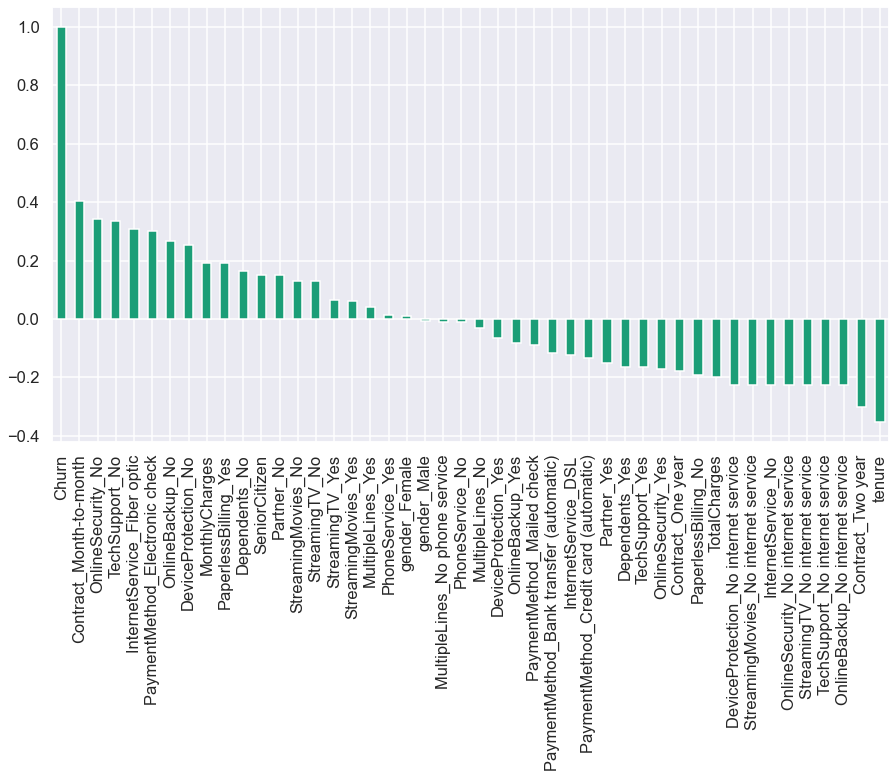

In [13]:
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No...etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No...etc. are negatively correlated with Churn.


Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport..., etc. with InternetService_No seem to be negatively related to Churn. Need to explore the patterns more for the above correlations below before modelling and identifying the important variables.

In [14]:
df_dummies.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


# Data exploration and Visualisation

Doing more visualization to better understand the patterns in the data and potentially form some hypothesis. First looking at the distribution of individual variables and then slice and dice the data for to check if interesting trends are present.

Demographics to understand the gender, age range, patner and dependent status of the customers

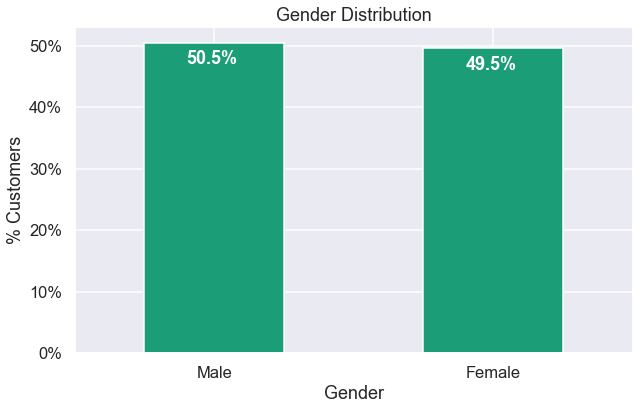

In [15]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')


Text(0.5, 1.0, '% of Senior Citizens')

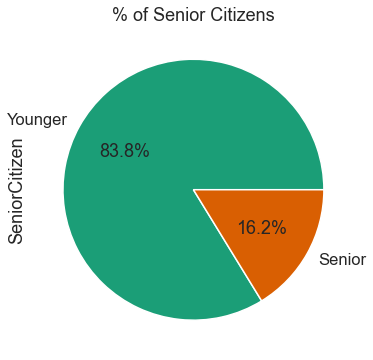

In [16]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

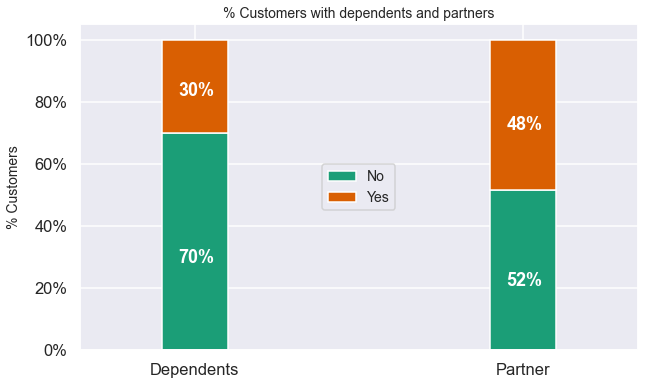

In [17]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.

It would be interesting is to look at the % of customers with both partners and dependents.

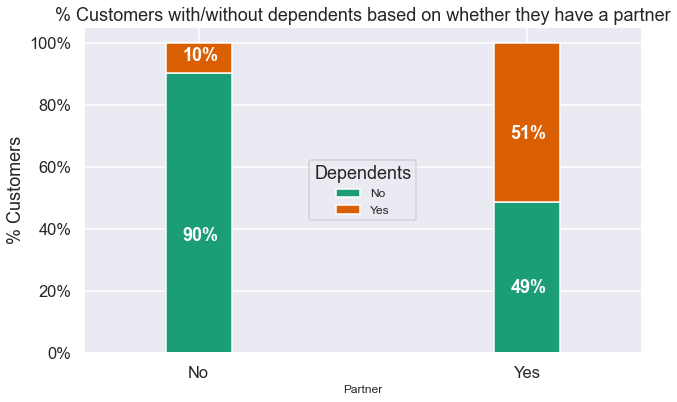

In [18]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents

A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

# Customer Account Information


Text(0.5, 1.0, 'Number of Customers by tenure')

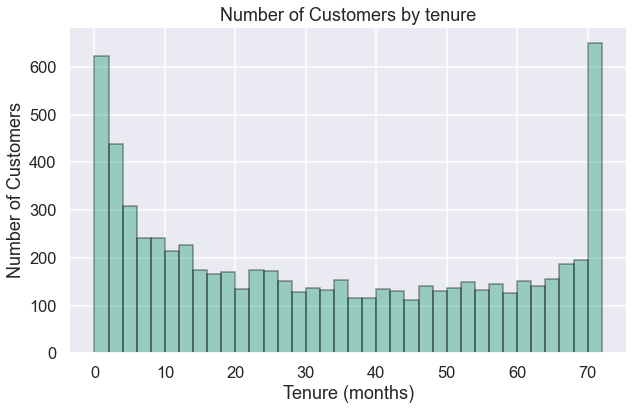

In [20]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

Checking the customers by tenure of contract

Text(0.5, 1.0, 'Number of Customers by Contract Type')

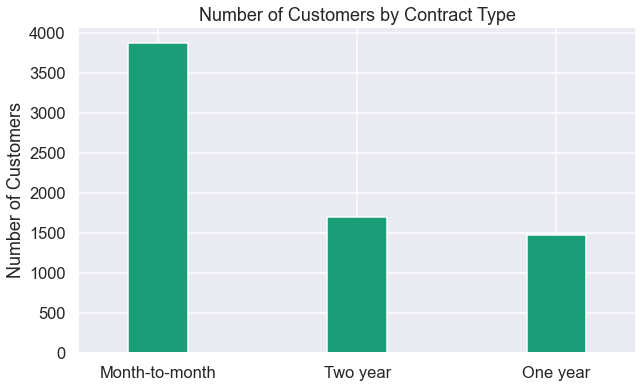

In [21]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts.

Text(0.5, 1.0, 'Two Year Contract')

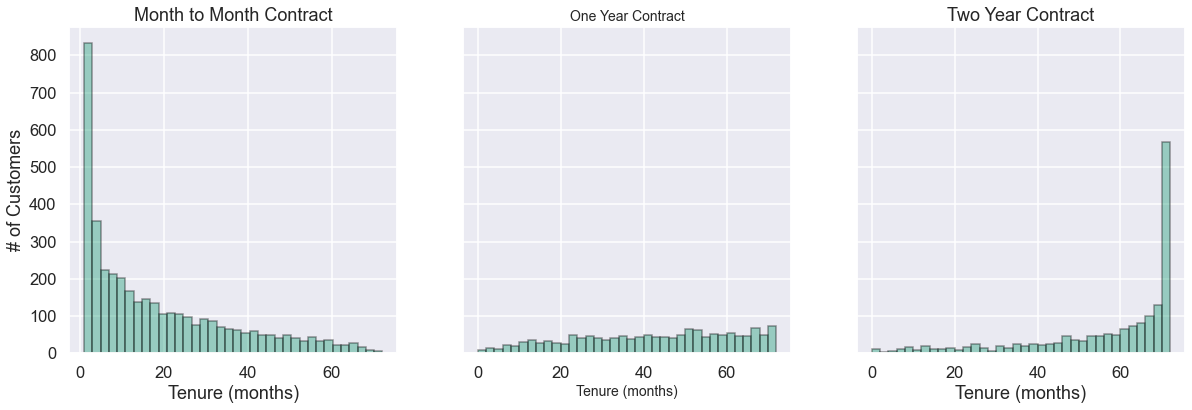

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

# Visualization of the distribution of various services used by customers


In [23]:
data.columns.values  


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

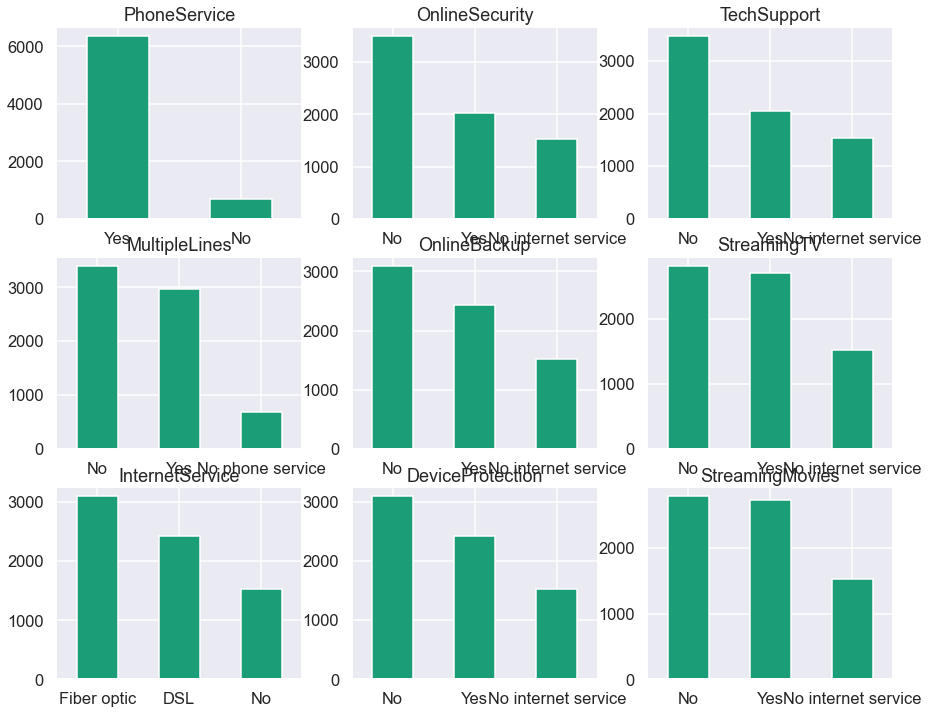

In [24]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Above plot displays a clear visbility of the different services provided by the Telecom company and availabled by the customers.



# Datamining to check prediction variable and it's interaction with other variables


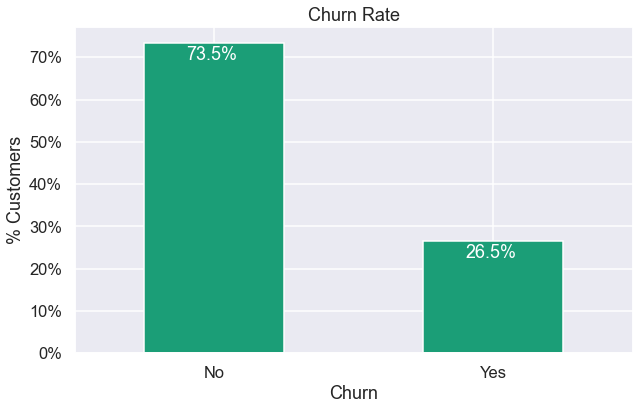

In [25]:
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling.

Text(0, 0.5, 'Monthly Charges')

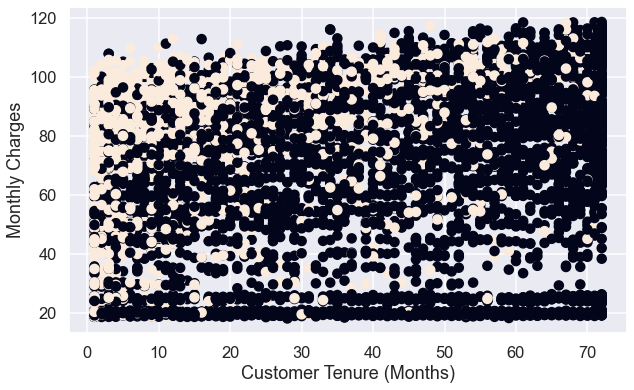

In [26]:
rcParams['figure.figsize']=10,6
sns.set(style='darkgrid', context='talk', palette='Dark2')

plt.scatter(
   df_dummies['tenure'], 
 df_dummies['MonthlyCharges'], c=df_dummies['Churn'])
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')

It’s hard to draw any conclusions from this visualization which compares the customer’s tenure with their monthly charges. So, this plot has been redrawn on boxplot for better visualization.

However, from below plot, it can be clearly seen that, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

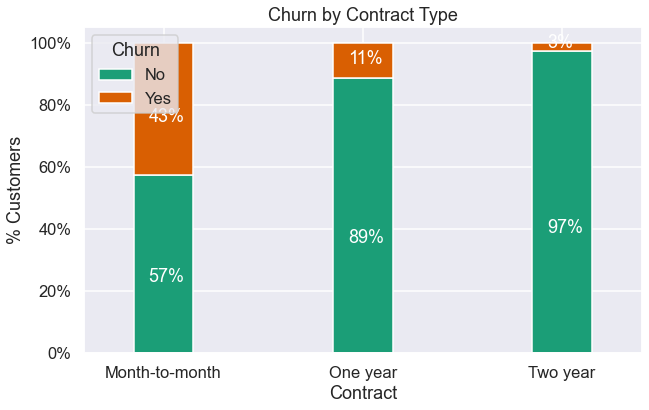

In [27]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

Above plot too is no different from the correlation plot and information we obtained so far, the customers who have a month to month contract have a very high churn rate. This gives some valuable input to sales/marketing department.

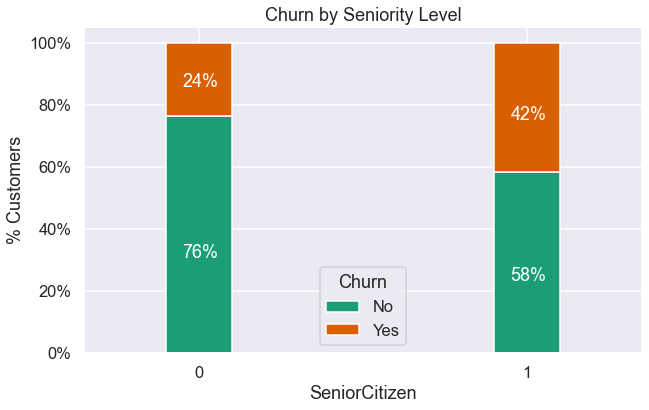

In [28]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')

From above plot, it is aparent that senior Citizens have almost double the churn rate than younger population. To explore the reason, the below plot was drawn which clearly shows higher % of customers churn when the monthly charges are high. This includes Sr Citizens too.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

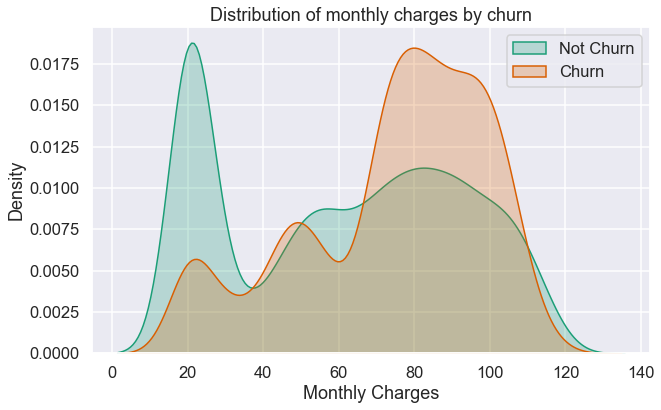

In [29]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, shade= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# Assumptions

For the purpose of this analysis, 2 assumptions can be made:

1) For each customer that left the company, it would cost Telco dollar 500.00 to replace that customer. Marketing, ads, campaigns, and outreach — the cost adds up.

2) Retain each customer who was likely to churn by investing dollar 100 in them. This could be through discounts, improving service (upping their internet speed, for example), or offering perks.

Above measures are part of diagnostic analytic.

# Predictive Modelling


We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 20% of the total records. It is important to scale the variables in regression so that all of them are within a range of 0 to 1.

Logistic regression requires there to be little or no multicollinearity among the independent variables. Therefore, as discussed in the begining, Total Charges will be removed.

In [30]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Methodology
Our first step was to split our data into training and test sets using train-test-split, which would allow us to cross-validate our results later. We also stratified the train-test-split, to ensure that the same proportion of our target variable was found in both our training and test sets.

Spiliting the data
X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio. Also ned to stratify the train-test-split to have a balanced split



In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


Logistic regression
Using machine learning algorithm and the dependent variable here churn 1 or churn 0 is categorical. The trained model can be used to predict if a customer churned or not for the test dataset. The results are saved in “prediction_test” and afterwards the accuracy score is measured and printed.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [33]:
print('Intercept: ' + str(result.intercept_)) # reporting the intercept
print('Regression: ' + str(result.coef_)) # reporting the co-efficients

Intercept: [-0.98796421]
Regression: [[ 0.18715203 -2.43931052 -0.00852696  0.01488479 -0.01485238  0.01063182
  -0.01059941  0.11062871 -0.11059629  0.11728069 -0.11724828 -0.17017432
   0.11728069  0.05292605 -0.45958975  0.56526356 -0.10564139  0.22501642
  -0.10564139 -0.11934261  0.11825689 -0.10564139 -0.01258308  0.04802402
  -0.10564139  0.05764979  0.22540659 -0.10564139 -0.11973278 -0.08884817
  -0.10564139  0.19452198 -0.08917767 -0.10564139  0.19485148  0.62148968
  -0.04373557 -0.5777217  -0.15446257  0.15449499 -0.03627493 -0.15979595
   0.24576996 -0.04966666]]


Confusion matrix
[[937  96]
 [183 191]]


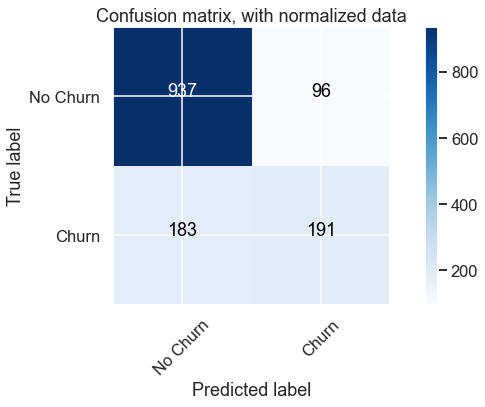

In [34]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

The classification rate of 80%, considered as good accuracy. However, it may not be the right measure at times, when the data is skewed and target class is not balanced . So, additional measures like Precision, Recall, F score (combined metric) have been considered.
However, the precision (0.66%) and recall (0.51%) for predictions in the positive class (churn) are relatively low, which suggests the data set may be imbalanced.

The confusion matrix clearly shows the model performance broken down into true positives, true negatives, false positives, and false negatives.

Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives.

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

The end goal for the project is to know every single customer who will churn and how much insight can be generated. Target is to focus on to keep the cutomers and how much company could spend to keep them before having them as a customer turned into a loss. So considering the final goal is to reduce churn and take the right preventing actions in time, need to check which independent variables have the most influence on the predicted outcome. Therefore setting the coefficients in the model to zero and reviewing at the weights of each variable.

In [35]:
#F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.60


In [36]:
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

It can be observed that some variables have a positive relation to our predicted variable (Churn) and some have a negative relation.
- “Contract_Month-to-month”: The positive relation to churn means that having this type of contract also increases the 
   probability of a customer to churn. 
- “Contract_Two year” is in a highly negative relation to the predicted variable, which means that customers with this type 
   of contract are very unlikely to churn.

Some of the variables do not make sense in the first point.

“Fiber_Optic” is on top of this list in terms of a positive impact on churn. While it is expected that advantage of Fiber optic makes a customer stay, but the model has a different story to tell. Here it is important to delve deeper into the analysis and get some context for the data.

# AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve
AUCROC tells how much the model is capable of distinguishing between Churn and NoChurn. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between Churn and NoChurn

In [40]:
df_dummies['Churn'].value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

The class for churn is only around 30% of the total population of samples. There is a real risk thatthe model trained on this data may only make too many predictions in favour of the majority class. To balance the data set, need to randomly duplicate observations from the minority class.

In [41]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority class
random_state=1) #set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

Now that we have a 1:1 ratio for our classes, will train another logistic regression model


In [42]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

In [52]:
from sklearn.metrics import roc_auc_score
 

# Get class probabilities for both models
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)


# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8408094382697195
Balanced model AUROC: 0.7505103189493434


# AUROC scores are >7.0 in both the models. Unbalanced model is >8.0. This suggests that both models have the ability to distiguish between observations from each class.
K-fold cross validatio

10-fold Cross-validation is used to estimate the skill of model. On each fold, it splits the data into a training set and a testing set fits itself on the training set and evaluates itself on the testing set using the concordance measure by default.

In [53]:
from sklearn.model_selection import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.83 0.8  0.8  0.82]
Mean of scores:  0.8033801508188846


Model has provided 80% accuracy so far after all necessary validation and cross validation.


Survival Analysis
Logistic Regression is assigning a probability to each observation that describes how likely it is to belong to the positive class.

In any large enough group of customers like Telecom there are going to be people who have the same attributes / features. Some of those will churn and some of them won’t, and what Telecom company ideally like to know is the probability of churn for each group. This is what Logistic Regression provides. But it is not clear what time scale it is predicting for. Therefore, survival analysis was conducted for this purpose.

Kapalan-Meier and Cox Proportional Hazards Model
Kapalan is fully parametric and the Cox PH Model is semi-parametric.

Kapalan-Meier Kaplan-Meier need specification of the distribution of the underlying hazard. CoxPH analyses the covariates (features) of a dataset with regards to how long a customer survives. It describes how each feature proportionally increases risk over the baseline survival rate for a cohort.

Mathematical Intuition
T is the time from customer’s(a randomly selected customer) subscription to the customer churn. It is a continuous random variable, therefore it can take any real value.

T has a probability density function f(t) , and cumulative distribution function F(t) . pdf : f(t) cdf : F(t)

As per the definition of cdf from a given pdf, we can define cdf as: F(t) = P (T< t) here , F(t) gives us the probability that the event has occurred by duration t.

Survival Function: S(t) = 1 - F(t)= P(T ≥t)

S(t) gives us the probability that the event has not occurred by the time t.

Hazard Function -h(t) : Along with the survival function, we are also interested in the rate at which event is taking place, out of the surviving population at any given time t. h(t) = [( S(t) -S(t + dt) )/dt] / S(t) limit dt → 0

Here we have each customer’s tenure when they churned (the event time T) and the customer’s Gender, MonthlyCharges, Dependants, Partner, PhoneService etc. The other variables are the covariates in this example. We are interested in how these covariates impacts the survival probability function.

In such cases, it is the conditional survival function S(t|x) = P(T > t|x). Here x denotes the covariates. In our example, we are interested in S(tenure > t|(Gender, MonthlyCharges, Dependants, Partner, PhoneService etc)).

The Cox model assumes that the covariates have a linear multiplication eﬀect on the hazard function and the eﬀect stays the same across time.

From its formulation above we can see that it has two parts. Lets understand each part

Instantaneous rate of event: ( S(t) -S(t + dt) )/dt this can also be seen as the slope at any point t of the Survival Curve, or the rate of dying at any time t.

Also lets assume the total population as P.

here, S(t) -S(t + dt) , this difference gives proportion of people died in time dt, out of the people who survived at time t.

- Number of customers surviving at t is S(t)*P  
- number of customers surviving at t+dt is S(t+dt)*P. 
- Number of customers left during dt is (S(t) -S(t + dt))*P. 
- Instantaneous rate of customers leaving at time t is (S(t) -S(t + dt))*P/dt.
Proportion Surviving at time t: S(t); We also know the surviving population at time t, S(t)*P.

Thus dividing number of customers left in time dt, by the number of customers survived at any time t, gives us the hazard function as measure of RISK of the customer leaving, which survived at the time t.

The hazard function is the probability of failure in an inﬁnitesimally small time period between (t) and (t+ dt) given that the subject has survived up till time t. In this sense, the hazard is a measure of risk: the greater the hazard between times t1 and t2, the greater the risk of failure in this time interval.

We have : h(t) = f(t)/S(t) ; Since we know that ( S(t) -S(t + dt) )/dt = f(t)

This is a very important derivation. The Survival function can be derived from Hazard function and vice versa.

For each customer, two important data points for survival analysis are required
‘Tenure’: how long they have been a customer when the data is observed ‘Churn’: whether or not the customer left when the data was observed

In [54]:
# transform tenure and churn features
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


# Kaplan-Meier


In [67]:
a = pd.read_csv('Telecom_customer_churn.csv')
a.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [68]:
dummies = pd.get_dummies(a[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])

In [69]:
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [70]:
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   gender_Female                            7043 non-null   uint8  
 3   gender_Male                              7043 non-null   uint8  
 4   Partner_No                               7043 non-null   uint8  
 5   Partner_Yes                              7043 non-null   uint8  
 6   Dependents_No                            7043 non-null   uint8  
 7   Dependents_Yes                           7043 non-null   uint8  
 8   PhoneService_No                          7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  MultipleLines_No                         7043 no

In [71]:
a = a[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

a.head()

,SeniorCitizen,tenure,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,Churn_Yes
0,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,29.85,29.85,0
1,0,34,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,56.95,1889.50,0
2,0,2,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,53.85,108.15,1
3,0,45,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,42.30,1840.75,0
4,0,2,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,70.70,151.65,1


Head of the dummied and reduced dataset; Gender_Male has disappeared, as has Partner_No, Dependents_No and so on. For any matrix-based regression , Singular Matrices always throw an error in Python . Therefore, had to throw one of the colulmns away while creating dummy variables. We will still be able to infer the missing category from the remaining variables.

For CoxPH test, Churn column is the event observation in the single dataset that’s passed to the fit call. Need to split dataset in two (train and test).

# Testing the proportional hazard assumptions
The proportional hazard assumption is that all customers have the same hazard function, but a unique scaling factor infront. So the shape of the hazard function is the same for all customers, and only a scalar infront changes.

            hi(t) = (ai)h(t)

At the core of the assumption is that ai is not time varying, that is, ai(t) = ai. Further more, if we take the ratio of this with the hazard,

            hi(t) / hj(t) = (ai)h(t) / (aj)h(t) = (ai) / (aj)
is constant for all t.

# Project Completed